In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary Statistics:
 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

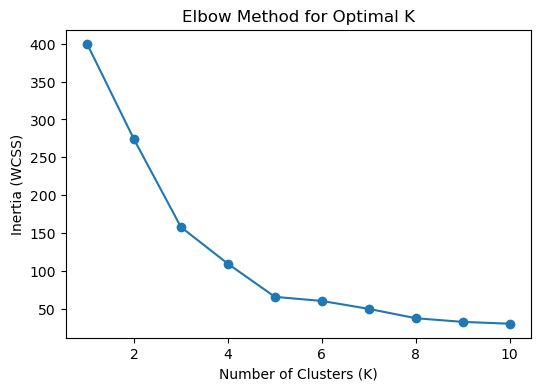

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


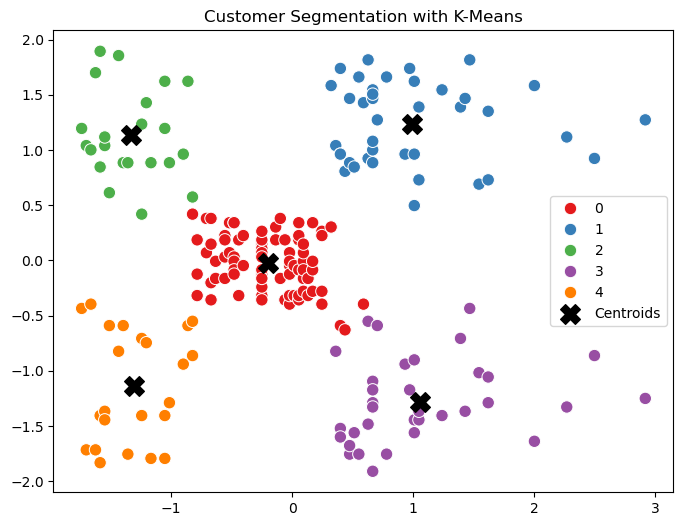

Silhouette Score: 0.5546571631111091

Clustered data saved as 'Clustered_Customers.csv'


In [4]:
# ---------------------------------------
# Step 1: Install & Import Required Libraries
# ---------------------------------------
# (Run this only if some libraries are missing)
# !pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# ---------------------------------------
# Step 2: Load the Dataset
# ---------------------------------------
# Dataset Link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
# Download CSV file and place it in the same folder as this notebook.

df = pd.read_csv("Mall_Customers.csv")  # Change file path if needed

# ---------------------------------------
# Step 3: Explore the Dataset
# ---------------------------------------
print("First 5 Rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# ---------------------------------------
# Step 4: Select Features for Clustering
# ---------------------------------------
# We'll use 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df.iloc[:, [3, 4]].values

# ---------------------------------------
# Step 5: Feature Scaling (Important for K-Means)
# ---------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------
# Step 6: Find the Optimal K using Elbow Method
# ---------------------------------------
inertia = []  # Sum of squared distances for each K
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

# ---------------------------------------
# Step 7: Train K-Means with Optimal K (Example: K=5)
# ---------------------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = labels

# ---------------------------------------
# Step 8: Visualize the Clusters
# ---------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set1', s=80)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c='black', s=200, marker='X', label='Centroids')
plt.legend()
plt.title("Customer Segmentation with K-Means")
plt.show()

# ---------------------------------------
# Step 9: Evaluate Clustering Quality
# ---------------------------------------
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

# ---------------------------------------
# Step 10: Save Results
# ---------------------------------------
df.to_csv("Clustered_Customers.csv", index=False)
print("\nClustered data saved as 'Clustered_Customers.csv'")


✅ Dataset Loaded. Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

✅ Selected numeric features for clustering: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

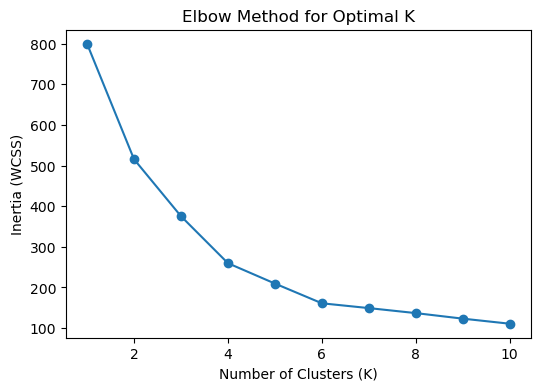

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


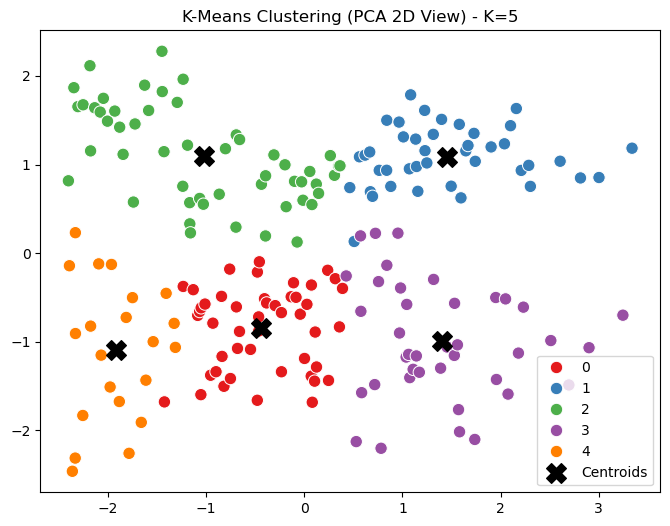


Silhouette Score: 0.4272395443393026

✅ Clustered data saved as 'Clustered_Data_PCA.csv'


In [5]:
# ---------------------------------------
# Step 0: Fix Windows MKL KMeans Warning
# ---------------------------------------
import os
os.environ["OMP_NUM_THREADS"] = "1"

# ---------------------------------------
# Step 1: Install & Import Required Libraries
# ---------------------------------------
# (Run this only if some libraries are missing)
# !pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ---------------------------------------
# Step 2: Load the Dataset
# ---------------------------------------
# You can use ANY dataset here — just change the filename
# Example: Mall Customers dataset (download from Kaggle)
# https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

df = pd.read_csv("Mall_Customers.csv")  # Change file path if needed

print("✅ Dataset Loaded. Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# ---------------------------------------
# Step 3: Prepare Features for Clustering
# ---------------------------------------
# Remove non-numeric columns (e.g., IDs, names)
df_numeric = df.select_dtypes(include=[np.number])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

print("\n✅ Selected numeric features for clustering:", df_numeric.columns.tolist())

# ---------------------------------------
# Step 4: Find the Optimal K using Elbow Method
# ---------------------------------------
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

# ---------------------------------------
# Step 5: Train K-Means with Optimal K
# ---------------------------------------
optimal_k = 5  # Change after checking elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = labels

# ---------------------------------------
# Step 6: PCA for 2D Visualization (Works for any dataset)
# ---------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set1', s=80)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0], 
            pca.transform(kmeans.cluster_centers_)[:,1], 
            c='black', s=200, marker='X', label='Centroids')
plt.legend()
plt.title(f"K-Means Clustering (PCA 2D View) - K={optimal_k}")
plt.show()

# ---------------------------------------
# Step 7: Evaluate Clustering Quality
# ---------------------------------------
score = silhouette_score(X_scaled, labels)
print("\nSilhouette Score:", score)

# ---------------------------------------
# Step 8: Save Results
# ---------------------------------------
df.to_csv("Clustered_Data_PCA.csv", index=False)
print("\n✅ Clustered data saved as 'Clustered_Data_PCA.csv'")


✅ Dataset Loaded. Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

✅ Using numeric features: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

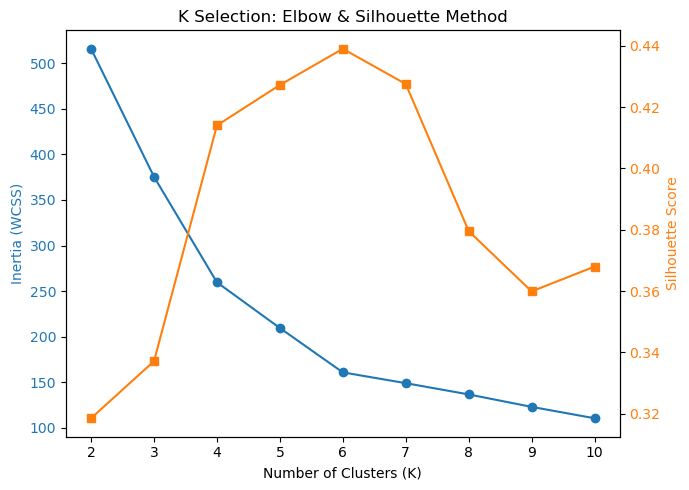

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


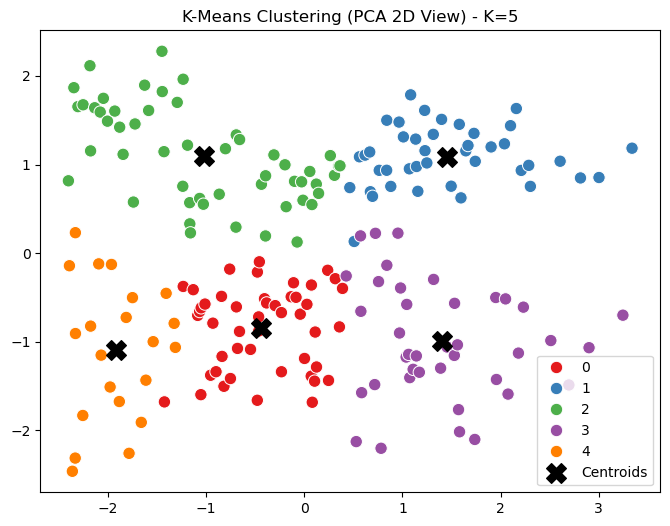


✅ Final Silhouette Score: 0.4272395443393026
💾 Saved as 'Clustered_Data_KSelection.csv'


In [6]:
# ---------------------------------------
# Step 0: Fix Windows MKL KMeans Warning
# ---------------------------------------
import os
os.environ["OMP_NUM_THREADS"] = "1"

# ---------------------------------------
# Step 1: Install & Import Required Libraries
# ---------------------------------------
# (Run this only if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ---------------------------------------
# Step 2: Load the Dataset
# ---------------------------------------
# Example dataset: Mall Customers
# https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
df = pd.read_csv("Mall_Customers.csv")  # Change file path

print("✅ Dataset Loaded. Shape:", df.shape)
print(df.head())

# ---------------------------------------
# Step 3: Prepare Features
# ---------------------------------------
df_numeric = df.select_dtypes(include=[np.number])  # Keep only numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

print("\n✅ Using numeric features:", df_numeric.columns.tolist())

# ---------------------------------------
# Step 4: Evaluate Multiple K Values
# ---------------------------------------
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Silhouette score needs min 2 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow & Silhouette together
fig, ax1 = plt.subplots(figsize=(7,5))

ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia (WCSS)', color='tab:blue')
ax1.plot(K_range, inertia, marker='o', color='tab:blue', label='Elbow (Inertia)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:orange')
ax2.plot(K_range, silhouette_scores, marker='s', color='tab:orange', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("K Selection: Elbow & Silhouette Method")
fig.tight_layout()
plt.show()

# ---------------------------------------
# Step 5: Train K-Means with Chosen K
# ---------------------------------------
optimal_k = 5  # Choose based on above plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels

# ---------------------------------------
# Step 6: PCA for Visualization
# ---------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set1', s=80)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0], 
            pca.transform(kmeans.cluster_centers_)[:,1], 
            c='black', s=200, marker='X', label='Centroids')
plt.legend()
plt.title(f"K-Means Clustering (PCA 2D View) - K={optimal_k}")
plt.show()

# ---------------------------------------
# Step 7: Final Silhouette Score
# ---------------------------------------
final_score = silhouette_score(X_scaled, labels)
print("\n✅ Final Silhouette Score:", final_score)

# ---------------------------------------
# Step 8: Save Results
# ---------------------------------------
df.to_csv("Clustered_Data_KSelection.csv", index=False)
print("💾 Saved as 'Clustered_Data_KSelection.csv'")


✅ Dataset Loaded. Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

✅ Using numeric features: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window


🎯 Best K (based on highest silhouette score): 6
✅ Best Silhouette Score: 0.4390404164555763


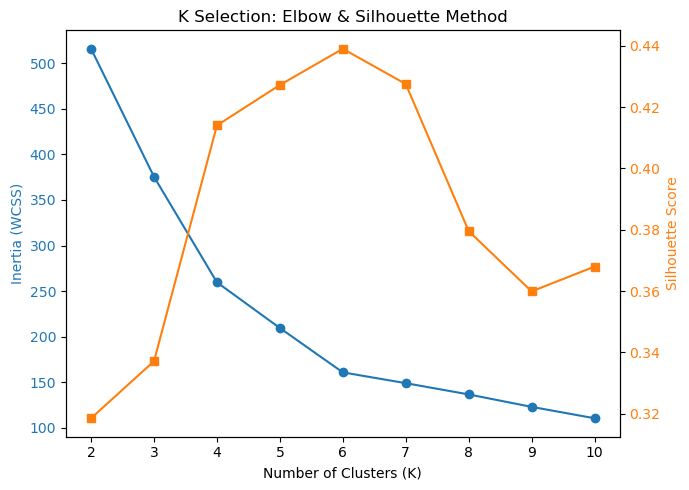

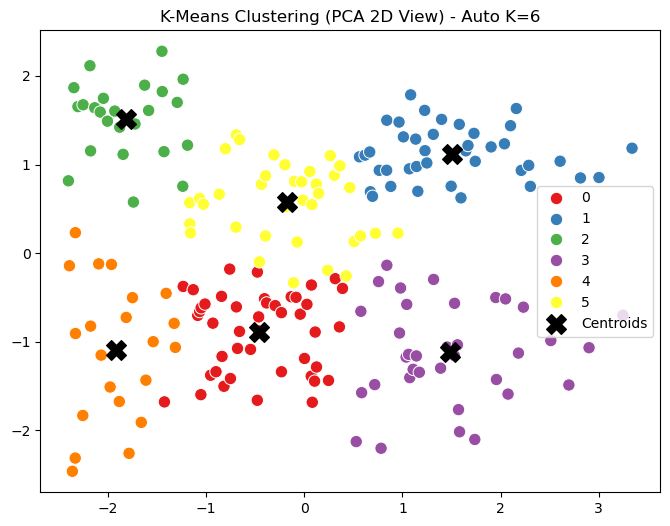


💾 Saved as 'Clustered_Data_AutoK.csv'


In [7]:
# ---------------------------------------
# Step 0: Fix Windows MKL KMeans Warning
# ---------------------------------------
import os
os.environ["OMP_NUM_THREADS"] = "1"

# ---------------------------------------
# Step 1: Import Required Libraries
# ---------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ---------------------------------------
# Step 2: Load the Dataset
# ---------------------------------------
# Example dataset: Mall Customers
# https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
df = pd.read_csv("Mall_Customers.csv")  # Change file path

print("✅ Dataset Loaded. Shape:", df.shape)
print(df.head())

# ---------------------------------------
# Step 3: Prepare Features
# ---------------------------------------
df_numeric = df.select_dtypes(include=[np.number])  # Keep only numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

print("\n✅ Using numeric features:", df_numeric.columns.tolist())

# ---------------------------------------
# Step 4: Automatically Find Best K
# ---------------------------------------
best_k = None
best_score = -1
best_model = None

inertia_values = []
silhouette_values = []

K_range = range(2, 11)  # Silhouette requires min 2 clusters

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    inertia = model.inertia_
    score = silhouette_score(X_scaled, labels)

    inertia_values.append(inertia)
    silhouette_values.append(score)

    if score > best_score:
        best_score = score
        best_k = k
        best_model = model

print(f"\n🎯 Best K (based on highest silhouette score): {best_k}")
print(f"✅ Best Silhouette Score: {best_score}")

# ---------------------------------------
# Step 5: Plot Elbow & Silhouette
# ---------------------------------------
fig, ax1 = plt.subplots(figsize=(7,5))

ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia (WCSS)', color='tab:blue')
ax1.plot(K_range, inertia_values, marker='o', color='tab:blue', label='Elbow (Inertia)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:orange')
ax2.plot(K_range, silhouette_values, marker='s', color='tab:orange', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("K Selection: Elbow & Silhouette Method")
fig.tight_layout()
plt.show()

# ---------------------------------------
# Step 6: Assign Best Model Labels
# ---------------------------------------
labels = best_model.predict(X_scaled)
df['Cluster'] = labels

# ---------------------------------------
# Step 7: PCA for Visualization
# ---------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set1', s=80)
plt.scatter(pca.transform(best_model.cluster_centers_)[:,0], 
            pca.transform(best_model.cluster_centers_)[:,1], 
            c='black', s=200, marker='X', label='Centroids')
plt.legend()
plt.title(f"K-Means Clustering (PCA 2D View) - Auto K={best_k}")
plt.show()

# ---------------------------------------
# Step 8: Save Results
# ---------------------------------------
df.to_csv("Clustered_Data_AutoK.csv", index=False)
print("\n💾 Saved as 'Clustered_Data_AutoK.csv'")
